# Estimador da Densidade de Probabilidade com Kernel
___

De acordo com [[1]](https://scikit-learn.org/stable/modules/density.html), a estimativa da densidade de probabilidade caminha entre aprendizado não-supervisionado, engenharia de atributos, e modelagem de dados. Entre as técnicas mais conhecidas, encontram-se o modelo de Mistura de Gaussianas (*Gaussian Mixture*), e abordagem de vizinhos, como a estimativa da densidade com kernel - *Kernel Density Estimator (KDE)*. 

Um estimador de densidade é um algoritmo onde através dos dados de um dataset $D^n, D \in \mathbb{R} \ s.t. \ D^n = x = \{x_1,...,x_n\}$ e produz uma estimativa da distribuição de probabilidade $D^d$de onde os dados são retirados. O KDE aplica uma mistura de Gaussianas ao seu extremo i.e. aplica uma Gaussiana a cada ponto, resultando, essencialmente, em um estimador de densidade de probabilidade não-paramétrico [[2]](https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html).

A estimativa da densidade é um conceito razoavelmente simples, sendo que a técnica mais amplamente utilizada e familiar são os histogramas, aplicados em variáveis unidimensionais contínuas. 



In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)

In [30]:
x1 = np.random.normal(0,1,100)
x2 = np.random.normal(5,1,100)
X = np.concatenate((x1,x2))

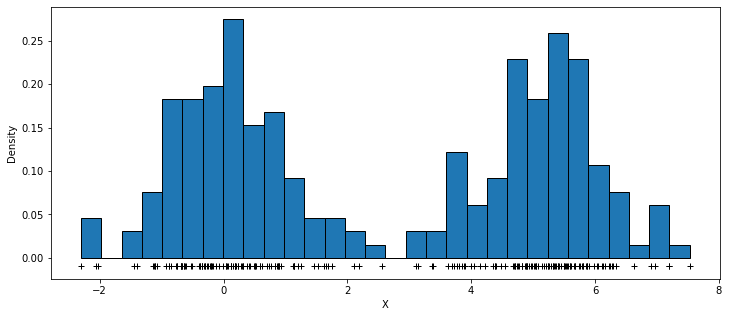

In [31]:
fig, ax=plt.subplots(figsize=(12,5))
ax.hist(X, bins=30, density=True, histtype='bar', ec='k')
ax.plot(X, np.full_like(X,-0.01), '+k', markeredgewidth=1)
ax.set(xlabel='X', ylabel='Density');

Entretanto, um dos problemas com histogramas se encontra nos intervalos (*bins*), os quais, dependendo da escolha, podem resultar em um efeito desproporcional no histograma, não apresentando as características fundamentais dos dados [[1]](https://scikit-learn.org/stable/modules/density.html), como demonstrado a seguir, onde, para os mesmos dados, dois valores de intervalo são utilizados:

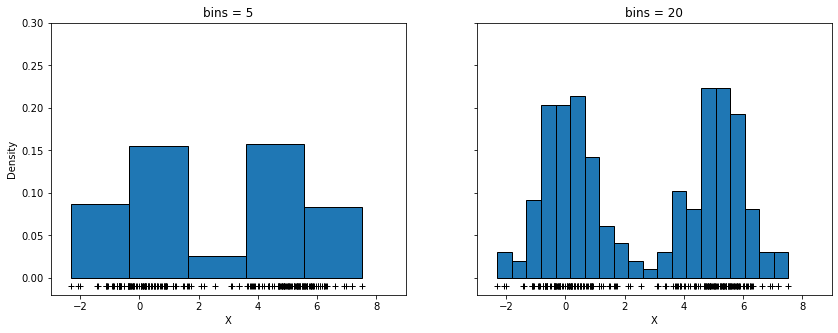

In [32]:
fig, axes = plt.subplots(1,2,figsize=(14,5), 
                              sharey=True,
                             subplot_kw={'xlim':(round(X.min()-1),round(X.max())+1),
                                        'ylim':(-0.02,0.3)})
bins = [5,20]

for ax,b in zip(axes.flatten(), bins):
    ax.hist(X, bins=b, density=True, histtype='bar', ec='k')
    ax.plot(X, np.full_like(X,-0.01), '+k', markeredgewidth=1)


axes[0].set(xlabel='X', ylabel='Density', title='bins = %s'%(bins[0]))
axes[1].set(xlabel='X', title='bins = %s'%(bins[1]));

Nota-se figura da direita apresenta uma melhor noção da bimodalidade da variável aleatória.

O problema com os intervalors dos histogramas se da pelo fato de que a altura das colunas se reflete não na densidade real de pontos próximos, mas em como as colunas se alinham com os pontos de dados, como é possível ver pelos pontos representados na faixa inferior, como |.

Outra diferenciação se encontra na normalização dos parâmetros, onde a somatória das colunas do histograma resulta em 1. Nesse caso, com a variação do intervalo, nota-se que para a figura da esquerda a densidade máxima da segunda coluna atinge um valor próximo a 0.2, sendo que an figura da direita, com intervalos menors, a densidade de algumas colunas aumenta, como pode ser visto entre as regiões 4 e 6. Entretanto, mesmo com tal variação na altura das colunas, como houve também redução da largura das mesmas, a somatória do histograma normalizado ainda resulta em 1.

Entretanto, se ao invés de juntar as colunas alinhadas com os intervalos, pudéssemos alinhá-las com os pontos que eles de fato representam, o resultado final fica mais suavizado, representando melhor as nuances dos dados, como na aplicação de uma função suavizadora Gaussiana, como a seguir:

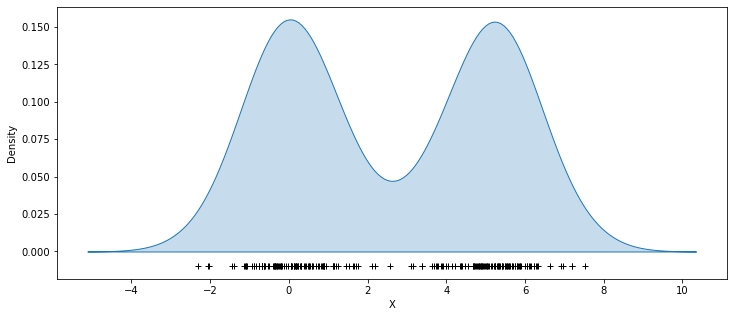

In [33]:
plt.figure(figsize=(12,5))
sns.kdeplot(X, fill=True)
plt.plot(X, np.full_like(X,-0.01), '+k', markeredgewidth=1)
plt.xlabel('X');

## KDE
___

Um *kernel* é uma função utilizada na estimativa da densidade de probabilidade da distribuição. O método de estimação tem como parâmetros o próprio kernel, função que especifica o formato da distribuição para estimar a densidade em cada ponto, e a largura de banda (*bandwidth*), a qual controla o tamanho do kernel em cada ponto. De acordo com o kernel, a estimativa da densidade em determinado ponto $y$ dentro de um grupo de pontos $x_i, \ i=1,...,n$, é:

$$\rho_K(y) = \sum_{i=1}^{N} K(y - x_i; h)$$

A biblioteca `sklearn` possui implementada o estimador `KernelDensity`, o qual possui entre suas funções:

- Kernel Gaussiano: $K(x; h) \propto \exp(- \frac{x^2}{2h^2} )$

- Kernel Tophat: $K(x; h) \propto 1 $ if $ x<h$

- Kernel Epanechinikov: $K(x; h) \propto 1 - \frac{x^2}{h^2}$

- Kernel Exponencial: $K(x; h) \propto \exp(-x/h)$

- Kernel Linear: $K(x; h) \propto 1 - x/h$ if $x<h$

- Kernel Cosseno: $K(x; h) \propto \cos(\frac{\pi x}{2h})$ if $x<h$

Uma vez que o KDE é computacionalmente intensivo, os estimadores da biblioteca utilizam algoritmos baseados em árvore (k-d tree [[3]](https://en.wikipedia.org/wiki/K-d_tree#:~:text=The%20k%2Dd%20tree%20is,%2C%20known%20as%20half%2Dspaces.) ou Ball Tree [[4]](https://en.wikipedia.org/wiki/Ball_tree#:~:text=A%20ball%20tree%20is%20a,are%20associated%20with%20different%20balls.)) visando o trade-off entre tempo computacional e acurácia.

A seguir são apresentados alguns exemplos de kernel com valores de banda default.

In [34]:
from sklearn.neighbors import KernelDensity

### Gaussian

In [35]:
# instanciar e dar fit nos dados
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(X.reshape(-1,1))

# vetor com pontos do eixo x
x_d = np.linspace(np.floor(X.min()), np.ceil(X.max()), X.shape[0])

# log da densidade de probabilidade
log_prob = kde.score_samples(x_d[:,None])
prob = np.exp(log_prob)

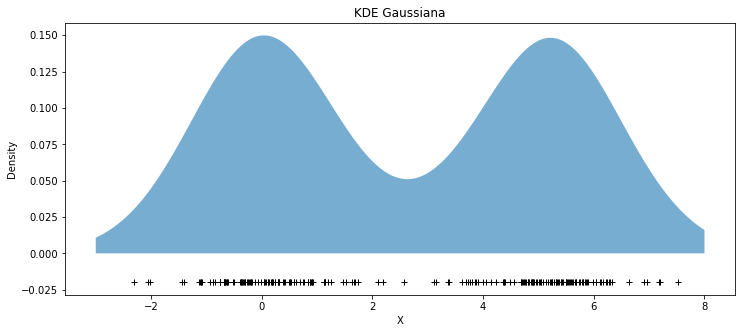

In [36]:
fig, ax=plt.subplots(figsize=(12,5))
ax.fill_between(x_d, prob, alpha=0.6)
ax.plot(X, np.full_like(X, -0.02), '+k', markeredgewidth=1)
ax.set(xlabel='X', ylabel='Density', title='KDE Gaussiana');

### Epachnikov

In [37]:
# instanciar e dar fit nos dados
kde = KernelDensity(kernel='epanechnikov', bandwidth=1).fit(X.reshape(-1,1))

# vetor com pontos do eixo x
x_d = np.linspace(np.floor(X.min()), np.ceil(X.max()), X.shape[0])

# log da densidade de probabilidade
log_prob = kde.score_samples(x_d[:,None])
prob = np.exp(log_prob)

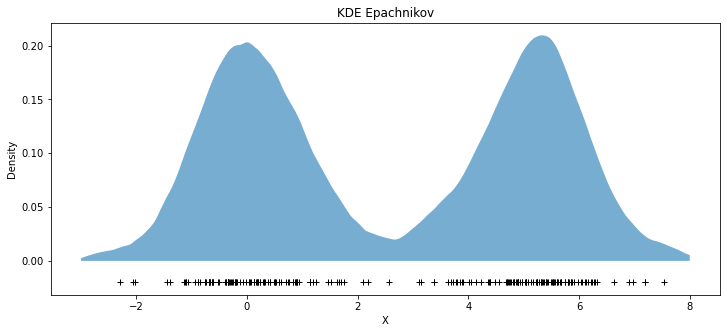

In [38]:
fig, ax=plt.subplots(figsize=(12,5))
ax.fill_between(x_d, prob, alpha=0.6)
ax.plot(X, np.full_like(X, -0.02), '+k', markeredgewidth=1)
ax.set(xlabel='X', ylabel='Density', title='KDE Epachnikov');

### Tophat

In [39]:
# instanciar e dar fit nos dados
kde = KernelDensity(kernel='tophat', bandwidth=1).fit(X.reshape(-1,1))

# vetor com pontos do eixo x
x_d = np.linspace(np.floor(X.min()), np.ceil(X.max()), X.shape[0])

# log da densidade de probabilidade
log_prob = kde.score_samples(x_d[:,None])
prob = np.exp(log_prob)

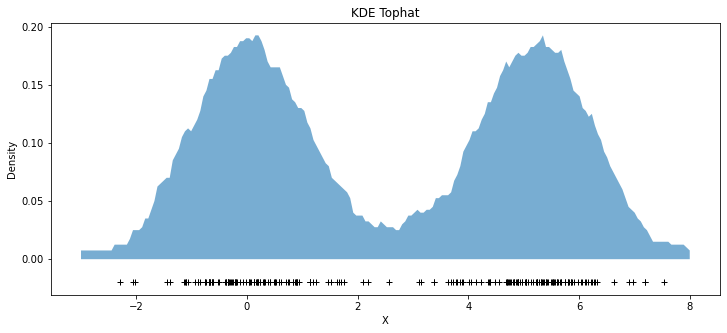

In [40]:
fig, ax=plt.subplots(figsize=(12,5))
ax.fill_between(x_d, prob, alpha=0.6)
ax.plot(X, np.full_like(X, -0.02), '+k', markeredgewidth=1)
ax.set(xlabel='X', ylabel='Density', title='KDE Tophat');

Nota-se a diferença entre as diferentes funções utilizadas anteriormente na suavização das densidades. Como comentado em [[5]](https://stats.stackexchange.com/questions/248203/appropriate-kernel-for-kernel-density-estimation), como o estimador utiliza o valor de banda $h$ para controlar a suavidade do da estimativa, a escolha do valor do parâmetro de banda é usualmente mais importante que a escolha do kernel.

## Otimizando a largura de banda
___

A escolha do valor de banda do KDE é extremamente importante na busca de uma boa estimativa da densidade de probabilidade, controlando o trade-off existente entre viés e variância, i.e. baixos valores de banda resultam em uma grande variância (*overfitting*), onde a presença ou ausência de um ponto faz uma grande diferença; enquando uma grande largura de banda resulta em um grande viés (*underfitting*), perdendo-se as nuances da estrutura dos dados [[1]](https://scikit-learn.org/stable/modules/density.html#kernel-density), [[2]](https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html).

Uma possibilidade é, portanto, otimizar o KDE em relação à largura de banda, procedimento comumente utilizado em aprendizado de máquina no ajuste de hiperparâmetros:

In [41]:
from sklearn.model_selection import GridSearchCV

bw = np.linspace(0.05,5,100)

search = GridSearchCV(KernelDensity(kernel='gaussian'),
                     {'bandwidth': bw},
                     cv=5)

search.fit(X[:,None]);

In [42]:
search.best_params_

{'bandwidth': 0.45}

## Comparação entre variáveis
___

Entretando, um ponto importante é o cálculo da probabilidade em regiões para testes comparativos entre variáveis elatórias. Suponha que em uma análise bivariada se tenha determinada variável contínua (e.g. idade) discretizada em função de outra variável categórica (e.g. gênero), e se busca analisar determinada região por um propósito qualquer. Através da estimativa da densidade, pode-se analisar a densidade de probabilidade de uma variável em determinada região através da aproximação:

$$ dp = \sum_{i=1}^{n} f(x_i) \Delta(x) $$

Sendo que $n$ é o número de pontos a serem avaliados, e $\Delta(x)$ seria o espaçamento entre pontos seguidos (similar a $h$), e $f(x_i)$ o kernel.

In [43]:
X1 = np.random.normal(0,2,100)
X2 = np.random.normal(1,2,100)

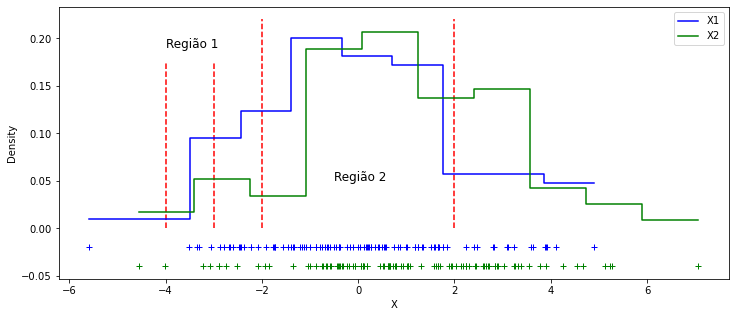

In [44]:
plt.figure(figsize=(12,5))
sns.histplot(X1, stat='density', element='step', fill=False, color='b', label='X1')
plt.plot(X1, np.full_like(X1, -0.02), '+b', markeredgewidth=1)
sns.histplot(X2, stat='density', element='step', fill=False, color='g', label='X2')
plt.plot(X2, np.full_like(X2, -0.04), '+g', markeredgewidth=1)
plt.vlines(x=-4, ymin=0, ymax=0.175, color='r', linestyles='--')
plt.vlines(x=-3, ymin=0, ymax=0.175, color='r', linestyles='--')
plt.text(x=-4, y=0.19, s='Região 1', size=12)
plt.vlines(x=-2, ymin=0, ymax=0.22, color='r', linestyles='--')
plt.vlines(x=2, ymin=0, ymax=0.22, color='r', linestyles='--')
plt.text(x=-0.5, y=0.05, s='Região 2',size=12)
plt.xlabel('X')
plt.legend();

In [45]:
def calculate_probability(x, kernel, bandwidth, eval_points, start_value, end_value):
    
    """Calcular integral da estimativa da densidade de probabilidade através do KDE"""
    
    # instanciar e fit
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(x.reshape(-1,1))

    # número de pontos a avaliar
    N = eval_points
    step = (end_value - start_value)/(N-1)
    
    # kde retorna log da densidade de probabilidade
    log_proba = kde.score_samples(x[:,None])
    proba = np.exp(log_proba)
    
    # integrar a densidade
    dens_proba = np.sum(proba*step)
    
    return dens_proba.round(4)

Nota-se que a densidade de probabilidade da variável X2 é superior à X1 para ambas as regiões apresentadas.

### Região 1

In [46]:
print('Região 1:',
      '\nDensidade de probabilidade de X1:',
        calculate_probability(X1, 'gaussian', 0.5, 50, -4, -3),
      '\nDensidade de probabilidade de X2:',
        calculate_probability(X2, 'gaussian', 0.5, 50, -4, -3)
)

Região 1: 
Densidade de probabilidade de X1: 0.2843 
Densidade de probabilidade de X2: 0.2883


### Região 2

In [47]:
print('Região 2:',
      '\nDensidade de probabilidade de X1:',
        calculate_probability(X1, 'gaussian', 0.5, 50, -2, 2),
      '\nDensidade de probabilidade de X2:',
        calculate_probability(X2, 'gaussian', 0.5, 50, -2, 2)
)

Região 2: 
Densidade de probabilidade de X1: 1.1372 
Densidade de probabilidade de X2: 1.1533


É importante notar que, diferentemente da probabilidade, a função de densidadede de probabilidade, como também a estimativa da densidade de probabilidade, podem assumir valores superiores a 1 para determinada região [[6]](https://en.wikipedia.org/wiki/Probability_density_function).